<ipython-input-1-98ec74696ad6>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(close['logReturns'], shade=True, color='blue')


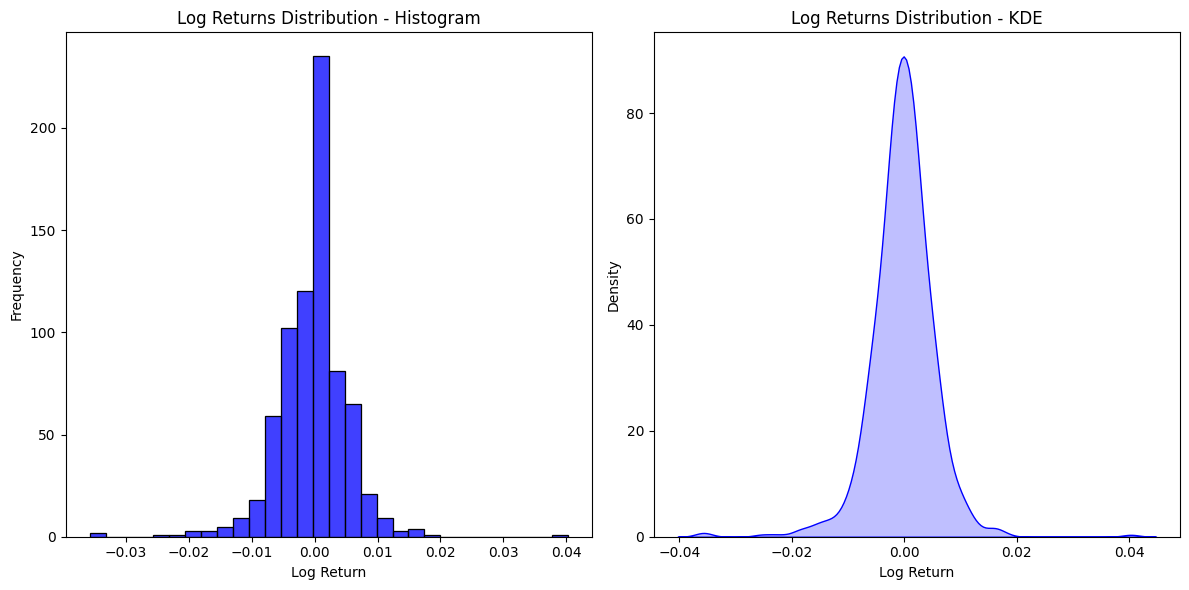

In [ ]:
import pandas as pd

path = "/home/anton/repos/global_models_thesis/data/spot/monthly/klines/AAVEUSDT/1h/AAVEUSDT-1h-2022-12.csv"

df = pd.read_csv(path, names=["openTime","open","high","low","close","volume","closeTime","quoteAssetVolume","numberOfTrades","takerBuyBaseAssetVolume","takerBuyQuoteAssetVolume","ignore"])

close =pd.DataFrame(df["close"])

import numpy as np

close["logReturns"] = np.log(close/close.shift(1))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(close['logReturns'], bins=30, kde=False, color='blue')
plt.title('Log Returns Distribution - Histogram')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(close['logReturns'], shade=True, color='blue')
plt.title('Log Returns Distribution - KDE')
plt.xlabel('Log Return')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

<ipython-input-2-7f24bf02bf23>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(close['logReturns'], shade=True, color='blue')


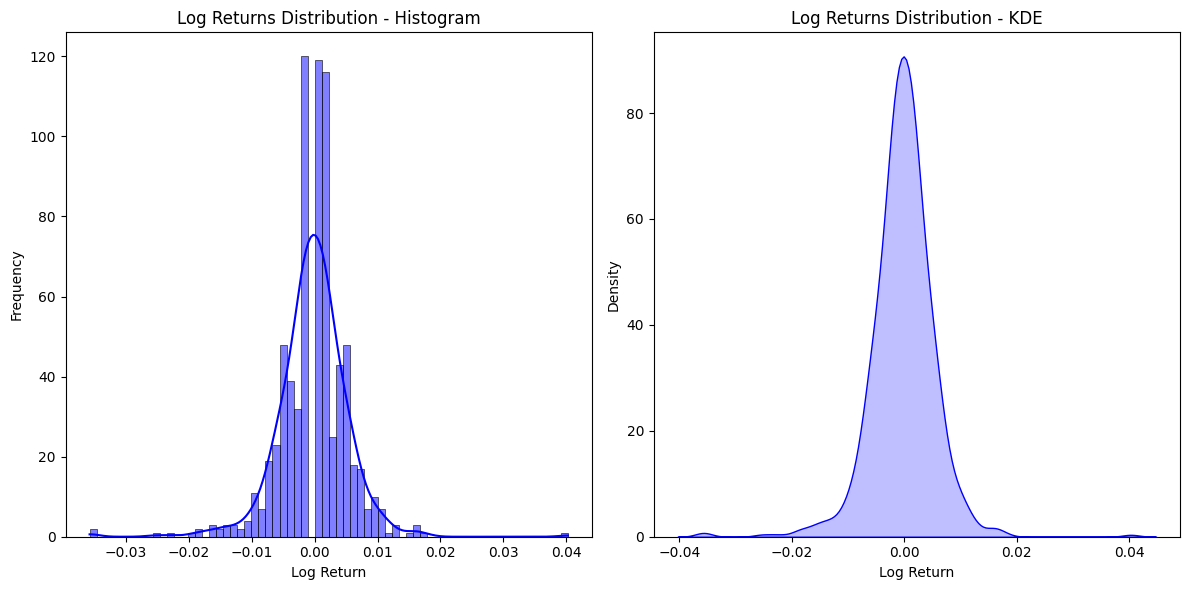

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(close['logReturns'], kde=True, color='blue')
plt.title('Log Returns Distribution - Histogram')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(close['logReturns'], shade=True, color='blue')
plt.title('Log Returns Distribution - KDE')
plt.xlabel('Log Return')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

<ipython-input-3-7ee086b2bab4>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(close['logReturns'], shade=True, color='blue')


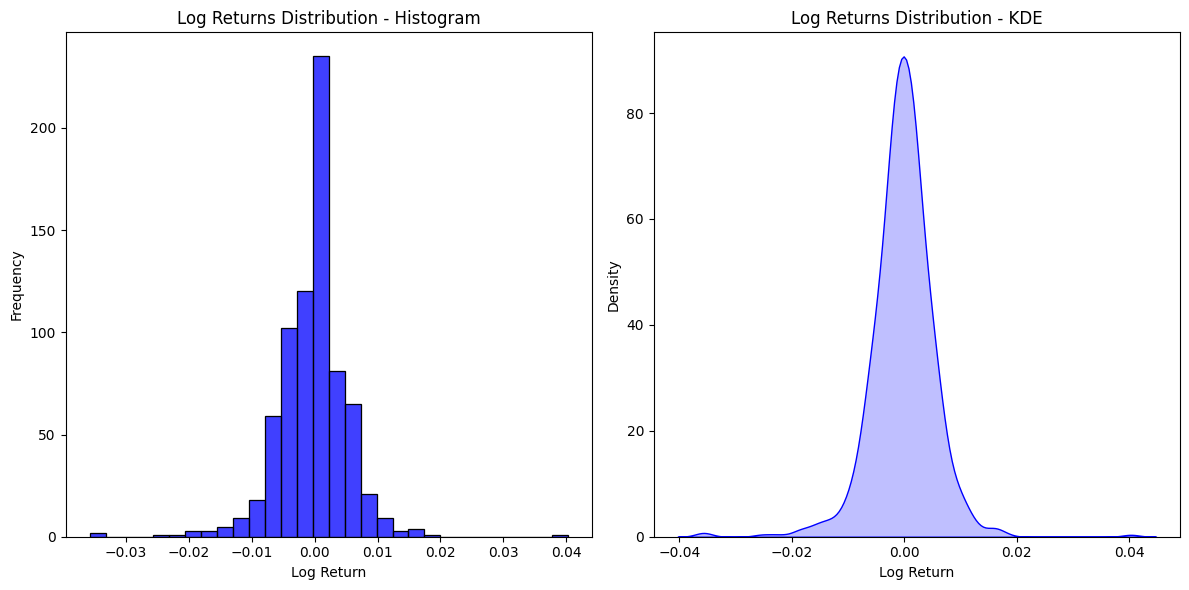

In [ ]:
import pandas as pd

path = "/home/anton/repos/global_models_thesis/data/spot/monthly/klines/AAVEUSDT/1h/AAVEUSDT-1h-2022-12.csv"

df = pd.read_csv(path, names=["openTime","open","high","low","close","volume","closeTime","quoteAssetVolume","numberOfTrades","takerBuyBaseAssetVolume","takerBuyQuoteAssetVolume","ignore"])

close =pd.DataFrame(df["close"])

import numpy as np

close["logReturns"] = np.log(close/close.shift(1))
close=close.iloc[1:]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(close['logReturns'], bins=30, kde=False, color='blue')
plt.title('Log Returns Distribution - Histogram')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(close['logReturns'], shade=True, color='blue')
plt.title('Log Returns Distribution - KDE')
plt.xlabel('Log Return')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

<ipython-input-4-7f24bf02bf23>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(close['logReturns'], shade=True, color='blue')


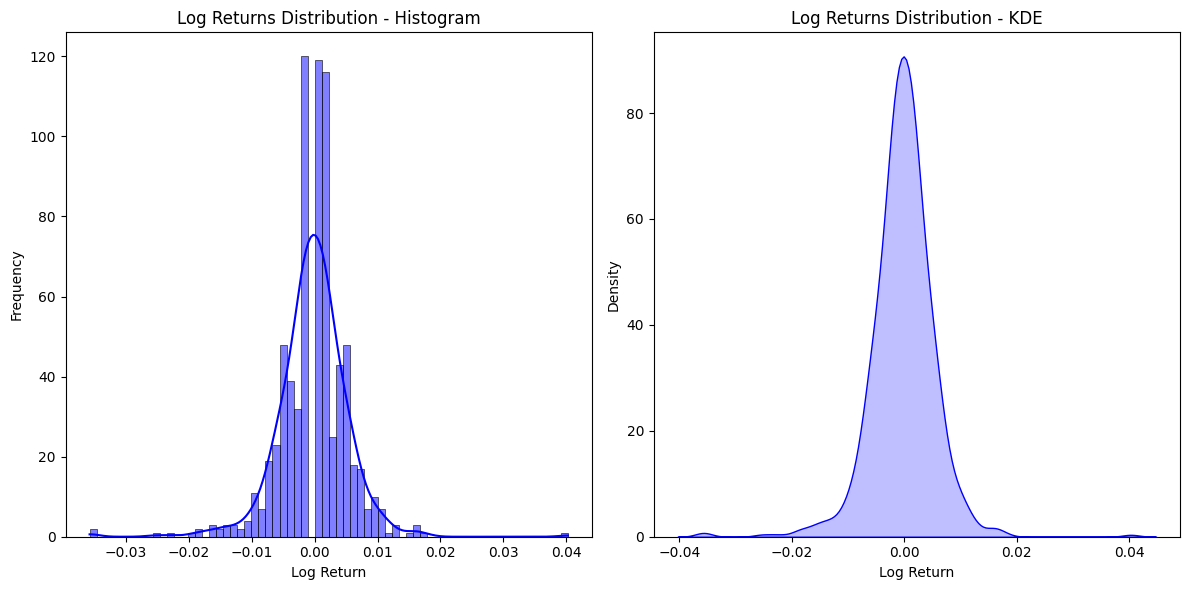

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(close['logReturns'], kde=True, color='blue')
plt.title('Log Returns Distribution - Histogram')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(close['logReturns'], shade=True, color='blue')
plt.title('Log Returns Distribution - KDE')
plt.xlabel('Log Return')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

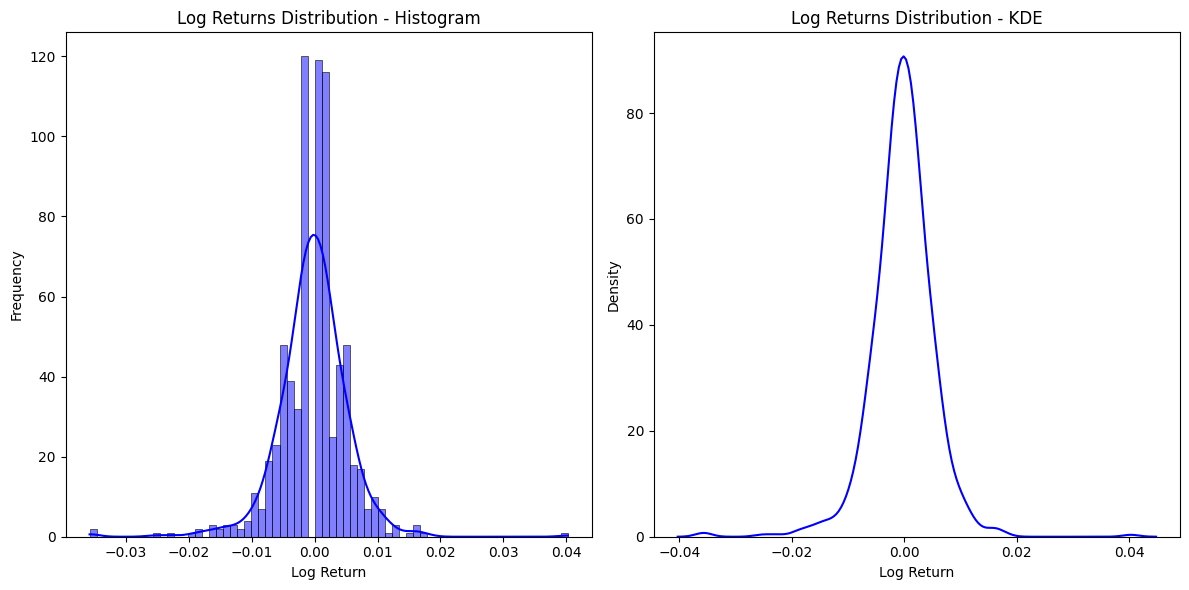

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(close['logReturns'], kde=True, color='blue')
plt.title('Log Returns Distribution - Histogram')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(close['logReturns'], color='blue')
plt.title('Log Returns Distribution - KDE')
plt.xlabel('Log Return')
plt.ylabel('Density')

plt.tight_layout()
plt.show()